In [1]:
#Loaded the appropriate packages for analysis
library(tidyverse)
library(tidymodels)
library(dplyr)
library(purrr)
install.packages("themis")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Read the data, and added colummn names/headings
cleveland<-read.delim("processed.cleveland.data", header=FALSE, sep=",")
cleveland<- rename(cleveland, 
                   age= V1,
                   sex= V2,
                   cp= V3,
                   trestbp= V4,
                   chol= V5,
                   fbs= V6,
                   
                   restecg= V7,
                thalach= V8,
                   exang = V9,
                   oldpeak = V10,
                   slope =V11,
                   ca = V12,
                   thal = V13,
                   num= V14) 
#Converted the num column(which tells us the severity and if the patient has heart disease) to a factor
#note that 0 means no heart disease, and 1-4 mean increasing levels of heart disease
cleveland|> mutate(num=as_factor(num))

age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [3]:
#selected only the columns that we will be using for our analysis

cleveland_0and4<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="4")
cleveland_0and4

age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
57,140,192,0,0
56,140,294,0,0
44,120,263,0,0
52,172,199,1,0


In [4]:
#Is the data balanced?
cleveland_balancecheck_0and4<- cleveland_0and4|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and4
#The data is heavily imbalanced.

num,count
<fct>,<int>
0,164
4,13


It might be better to use the numbers 0 and 3 or 0 and 2 or 0 and 1 for the presence and absence of heart disease. This is because severe heart disease might be very rare, and this classifier might be more helpful to the public if we use a numbers 2 or 3 which denote less severe heart disease, which is more common. This might also fix the issue of severe imbalance.


In [5]:
#0 and 3 test
cleveland_0and3<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="3")
#balance check
cleveland_balancecheck_0and3<- cleveland_0and3|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and3

#0 and 2 test
cleveland_0and2<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="2")
cleveland_0and2
#balance check
cleveland_balancecheck_0and2<- cleveland_0and2|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and2

#0 and 1 test
cleveland_0and1<-cleveland|> select(age, trestbp, chol, fbs, num)|>mutate(num=as_factor(num))|> filter(num=="0"|num=="1")
cleveland_0and1
#balance check
cleveland_balancecheck_0and1<- cleveland_0and1|> group_by(num)|> summarize(count=n())
cleveland_balancecheck_0and1

num,count
<fct>,<int>
0,164
3,35


age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
67,160,286,0,2
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
63,130,254,0,2
57,140,192,0,0
56,140,294,0,0


num,count
<fct>,<int>
0,164
2,36


age,trestbp,chol,fbs,num
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,0
67,120,229,0,1
37,130,250,0,0
41,130,204,0,0
56,120,236,0,0
57,120,354,0,0
53,140,203,1,1
57,140,192,0,0
56,140,294,0,0


num,count
<fct>,<int>
0,164
1,55


Using the numbers 0 and 2, 0 and 3 or 0 and 1 created a more balanced sample than using 0 and 4. Therefore, we will use the one of these options for the analysis. We have chosen to use 0 and 2 because it created a more balanced sample than 0 and 4. We are not choosing 0 and 1, which created a more balanced sample, because comparing the absence and slight presence of heart disease might result in insignificant differences in risk factor measurements that will make for an inaccurate classifier. Therefore, moving forward we will use 0 and 2 for the presence and absence of heart disease, but will still need to balance, center and standardize the data, which will be done when we are building the classifier in the recipe step.

In [28]:
cleveland_balance <- step_upsample(num, over_ratio = 1, skip = FALSE) |>
prep()
cleveland_balance

ERROR: Error in step_upsample(num, over_ratio = 1, skip = FALSE): could not find function "step_upsample"


In [29]:
#setting the seed
set.seed(1)
#created training(75%) and testing data 
cleveland_split<- initial_split(cleveland_0and2, prop=0.75, strata= num)
cleveland_train<- training(cleveland_split)
cleveland_test<- testing(cleveland_split)

In [30]:
cleveland_train

,age,trestbp,chol,fbs,num
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,145,233,1,0
3,37,130,250,0,0
4,41,130,204,0,0
8,57,140,192,0,0
9,56,140,294,0,0
13,57,150,168,0,0
16,49,130,266,0,0
17,64,110,211,0,0
18,58,150,283,1,0


In [12]:
#table containing the average values of all predictors of each severity of heart disease
average_predictors<-cleveland_train|> group_by(num)|>
summarize(across(age:fbs, mean))
average_predictors

num,age,trestbp,chol,fbs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.96748,130.4553,243.9106,0.1382114
2,59.07407,139.1852,257.2593,0.2962963


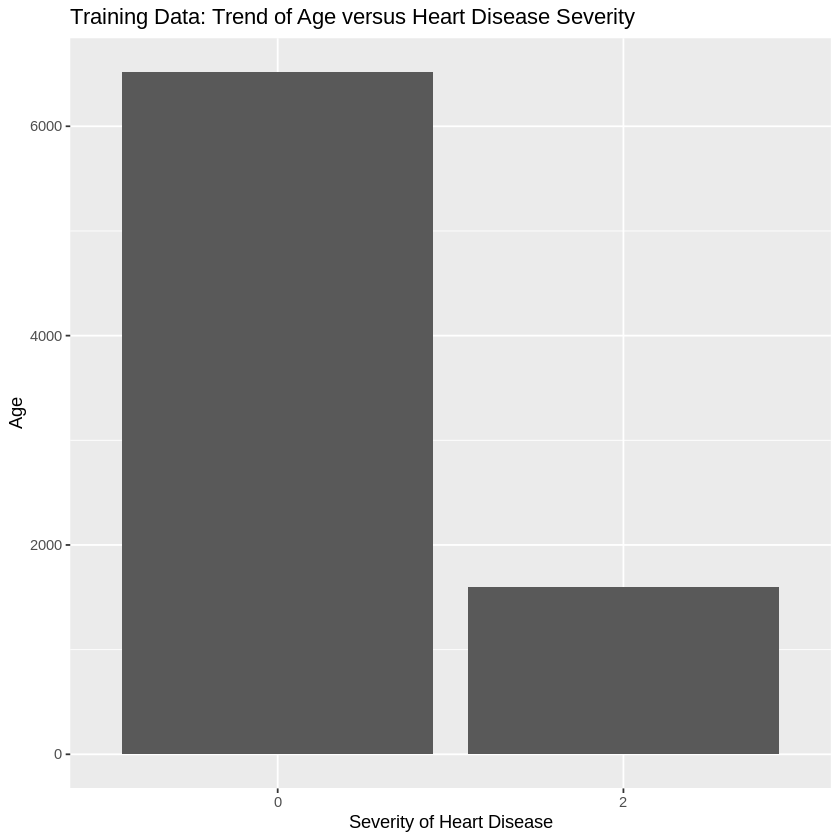

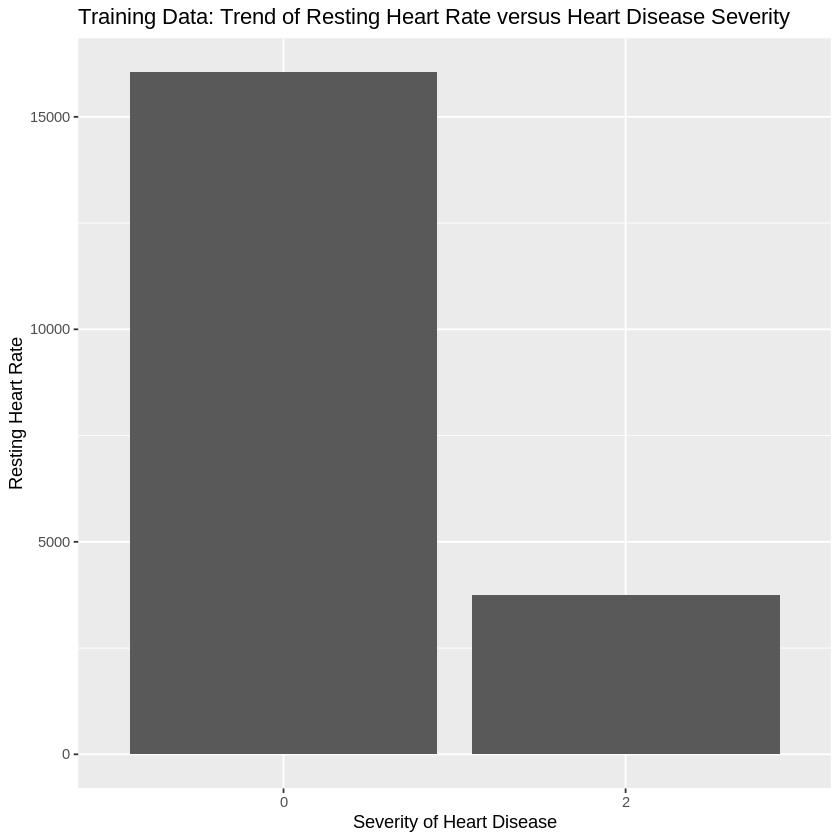

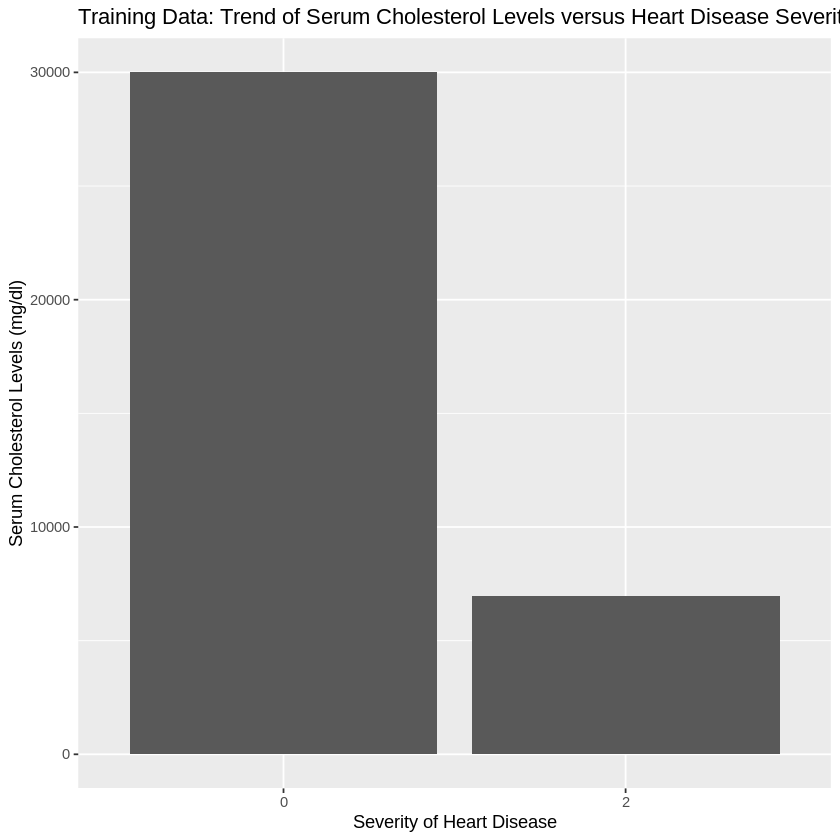

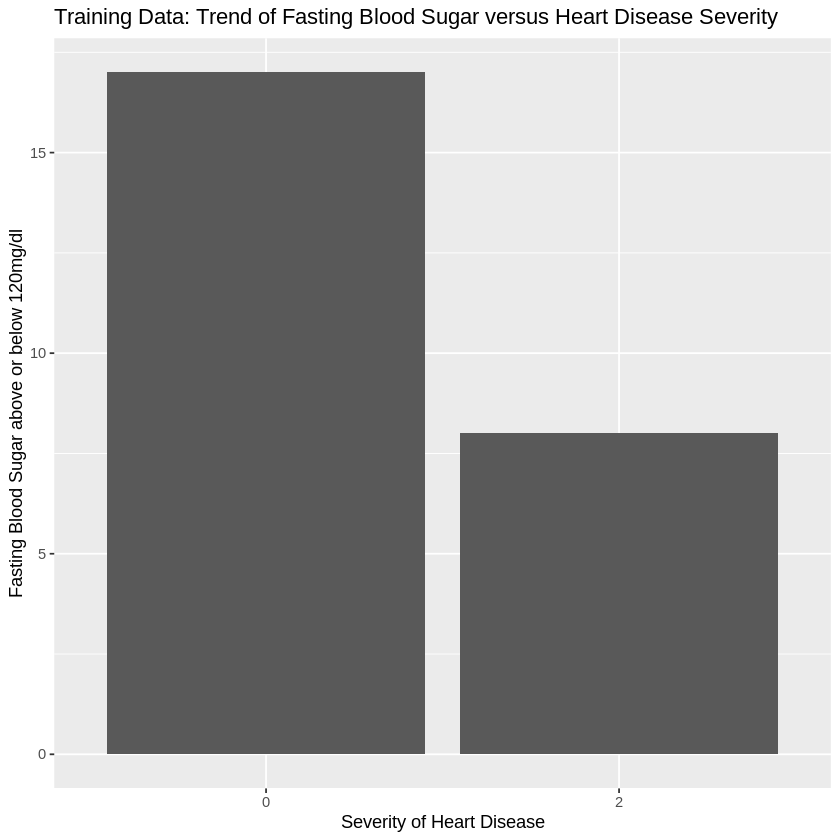

In [13]:
#graphs showing trends in predictor variables segregated by each class of heart disease severity. Note that each y-axis variable is the average value for each class of num 
cleveland_agenum_trend<- cleveland_train|> ggplot(aes(x=num, y=age))+geom_bar(stat="identity")+ labs(x="Severity of Heart Disease", y="Age")+ ggtitle ("Training Data: Trend of Age versus Heart Disease Severity")
cleveland_agenum_trend

cleveland_trestbpnum_trend<- cleveland_train|> ggplot(aes(x=num, y=trestbp))+geom_bar(stat="identity")+ labs(x="Severity of Heart Disease", y="Resting Heart Rate")+ ggtitle ("Training Data: Trend of Resting Heart Rate versus Heart Disease Severity")
cleveland_trestbpnum_trend

cleveland_cholnum_trend<- cleveland_train|> ggplot(aes(x=num, y=chol))+geom_bar(stat="identity")+ labs(x="Severity of Heart Disease", y="Serum Cholesterol Levels (mg/dl)")+ ggtitle ("Training Data: Trend of Serum Cholesterol Levels versus Heart Disease Severity")
cleveland_cholnum_trend

cleveland_fbsnum_trend<- cleveland_train|> ggplot(aes(x=num, y=fbs))+geom_bar(stat="identity")+ labs(x="Severity of Heart Disease", y="Fasting Blood Sugar above or below 120mg/dl")+ ggtitle ("Training Data: Trend of Fasting Blood Sugar versus Heart Disease Severity")
cleveland_fbsnum_trend

From the above plots, we can see that there are significant differences in the predictor variable values for each class of the num variable. Threfore these variables will likely be good predictor varables for an accurate classifier.

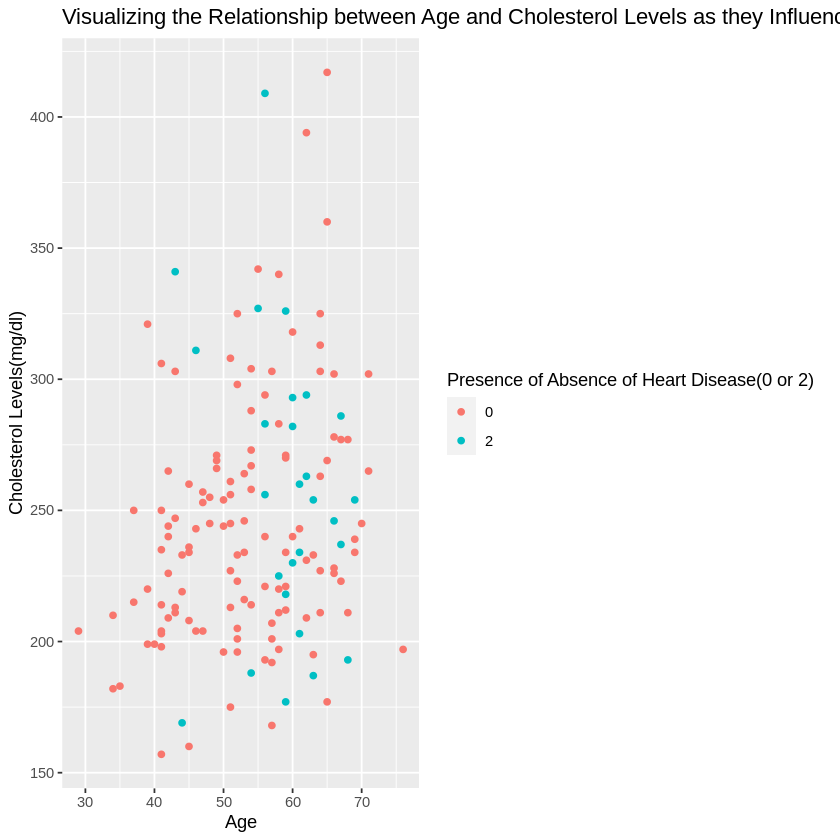

In [14]:
age_chol_heartdisease<- cleveland_train|>ggplot(aes(x=age, y=chol, color=num))+geom_point()+
labs(x="Age", y="Cholesterol Levels(mg/dl)", color="Presence of Absence of Heart Disease(0 or 2)")+ ggtitle("Visualizing the Relationship between Age and Cholesterol Levels as they Influence the Presence of Heart Disease")
age_chol_heartdisease

It can be seen that as age increases, so does cholesterol in a moderately positive reltionship. Since, we have yet to balance our sample, this graph is not very helpful in determining if there is a correlation between heart disease and these variables.